# Analysis

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Import data

In [2]:
data = pd.read_csv("Tripadvisordata_final.csv")

data= data.round(2)

list = []
for i in range(len(data["Type of food"])):  
    if "<div" in str(data["Type of food"][i]):
        list.append(i)
    
#print(list)
for i in list:
    data["Type of food"][i] = "Missing"


# set color "Tripadvisor-green"
green_color = "#00AF87"


C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [3]:
data.head()

,Restaurant,Main rating,Ranking on list,Price range,Price class,Location,Good price,Food,Service,Atmosphere,Type of food,Number of reviews,Address,Type of food link,New price class,Price class numeric,Reverse ranking on list,Full ranking,Distance from Kgs. Nytorv (m),Postal code
0,Burger King,1.0,2148.0,NaN,--$$$$$$,"55.65107,12.50931",NaN,NaN,NaN,NaN,NaN,2.0,"Ellebjergvej 142, København 2450 Danmark",NaN,$$$$$$,99,-2148.0,1,199.0,2450
1,Almanac,1.0,2146.0,NaN,---,"55.67788,12.591933",NaN,NaN,NaN,NaN,Dansk,2.0,"Havnegade 44, København Danmark","<div class=""header_links""><a href=""/Restaurant...",$$$$$$,99,-2146.0,2,459.0,
2,Star Midnight Kebab-Grill,1.0,2143.0,101,--$$-$$$---,"55.6679,12.54941",NaN,NaN,NaN,NaN,Grill,3.0,"Istedgade 101, København Danmark","<div class=""header_links""><a href=""/Restaurant...",$$-$$$,2,-2143.0,3,3431.0,
3,Sunset Boulevard,1.0,2137.0,NaN,--$$$$$$,"55.67502,12.580593",NaN,NaN,NaN,NaN,NaN,2.0,"Københavns Hovedbanegård, København 1570 Danmark",NaN,$$$$$$,99,-2137.0,4,908.0,1570
4,Dwaraka Indisk Restaurant,1.0,2104.0,141,--$$-$$$---,"55.72732,12.524776",NaN,NaN,NaN,NaN,Indisk,1.0,"Frederiksborgvej 221, St, København 2860 Danmark","<div class=""header_links""><a href=""/Restaurant...",$$-$$$,2,-2104.0,5,1171.0,2860


In [4]:
#creates a dataframe containing only the reastaurants with observations on Price range and converting the values to integers

price_df = data.dropna(subset = ["Price range"])

price_list = []
for i in price_df["Price range"]:
    price_list.append(str(i))

price_list2 = []
for i in price_list: 
    x = i.split("'")[0]
    x = x.replace(".","")
    price_list2.append(x)
    #print(x)
price_list3 = [] 

for i in price_list2:
    try:
        price_list3.append(int(i))
    except ValueError:
        price_list3.append("NaN")
        pass 

price_df["Price range int"] = price_list2

#price_df["Price range int"] = price_df["Price range int"].astype('int')


#results = [int(float(i)) for i in price_list2]    

price_df = price_df.dropna(subset = ["Price range int"])

print(len(set(price_df["Price range int"])))

price_df = price_df[price_df["Price range int"] != ","]

#price_list2.sort(key=int)




157


C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Generates and saves summary table of data

In [5]:
sum_tab = data.describe()
sum_tab.to_csv("Summary_tab.csv")

# Make copy of dataset containing only restaurants in greater-Copenhagen 

In [6]:
import matplotlib.pyplot as plt

mod_df = data.copy()

# Obs filter restaurants more than 10 km from Kgs. Nytorv
#mod_df = mod_df.drop(mod_df[mod_df[] > 15000 ].index , inplace=True)
mod_df = data[data["Distance from Kgs. Nytorv (m)"]<10000] # 10 km from Kgs. Nytorv (m)
price_df = price_df[price_df["Distance from Kgs. Nytorv (m)"]<10000] # 10 km from Kgs. Nytorv (m)


#mod_df.describe()
# OBS kør den forfra hvis du vil ændre i noget. 


In [7]:
# Mean ratings grouped by type of food
bar_df = mod_df.groupby(['Type of food'])['Main rating'].mean()
bar_df = pd.DataFrame(bar_df)

#bar_df.columns = ['Type of food', "Mean rating"]
bar_df2 = mod_df.groupby(['Type of food'])['Main rating'].count()
bar_df2 = pd.DataFrame(bar_df2)

bar_df3 = pd.merge(bar_df, bar_df2, on='Type of food', how='left')
bar_df3 = pd.DataFrame(bar_df3)

bar_df3.columns = ["Mean rating", "Number of restaurants"]
bar_df3.reset_index(inplace=True)

# Only if more than 10 restaurants
bar_df4 = bar_df3.loc[bar_df3['Number of restaurants'] > 10] 
bar_df4 = bar_df4.loc[bar_df3['Type of food'] != "Missing"] 

bar_df4 = bar_df4.sort_values(by=["Mean rating"])


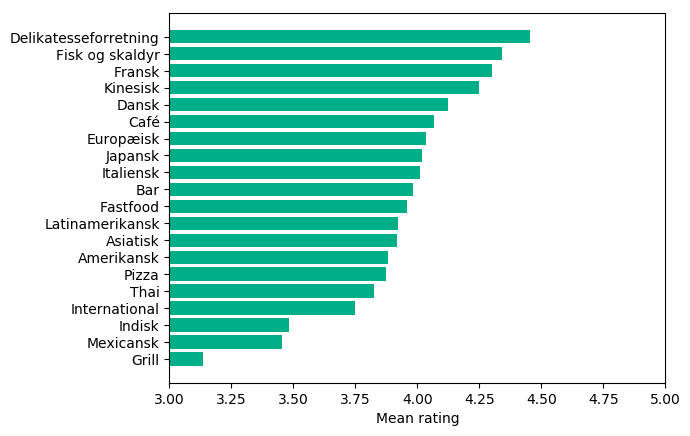

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()
plt.style.use('ggplot')

# Example data
rests = [bar_df4["Mean rating"]]
y_pos = bar_df4["Type of food"]
performance = bar_df4["Mean rating"]

ax.barh(y_pos, performance, align='center', color = green_color)
#ax.set_yticks(y_pos)
#ax.set_yticklabels("Type of food")
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean rating')
ax.set_xlim(3,5)
#ax.set_title('How fast do you want to go today?')
label = [bar_df4["Mean rating"]]


plt.savefig('barplot_type.jpeg')



In [9]:

dum_df = pd.get_dummies(mod_df['Type of food'])

list_food = set(mod_df['Type of food'])
list34 = []
for i in list_food:
    list34.append(i)
    
df_new = pd.concat([mod_df, dum_df], axis=1)



## OLS estmation of full ranking as funktion if distance, price class and number of reviews

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_df = df_new.loc[mod_df['Price class numeric'] != 99] 
reg_df = reg_df.loc[mod_df['Full ranking'] != 2000] 
reg_df = reg_df[pd.to_numeric(reg_df['Distance from Kgs. Nytorv (m)'], errors='coerce').notnull()]


reg1 = sm.OLS(endog=reg_df['Full ranking'], exog=reg_df[['Distance from Kgs. Nytorv (m)', 'Price class numeric', "Number of reviews"]], missing='drop')

results = reg1.fit()

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(results.summary().as_latex())
f.write(endtex)
f.close()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:           Full ranking   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1771.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:53:29   Log-Likelihood:                -12838.
No. Observations:                1633   AIC:                         2.568e+04
Df Residuals:                    1630   BIC:                         2.570e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Distance from 

## Generate scatterplot with fitted line of ranking as function of distance to Kongens Nytorv

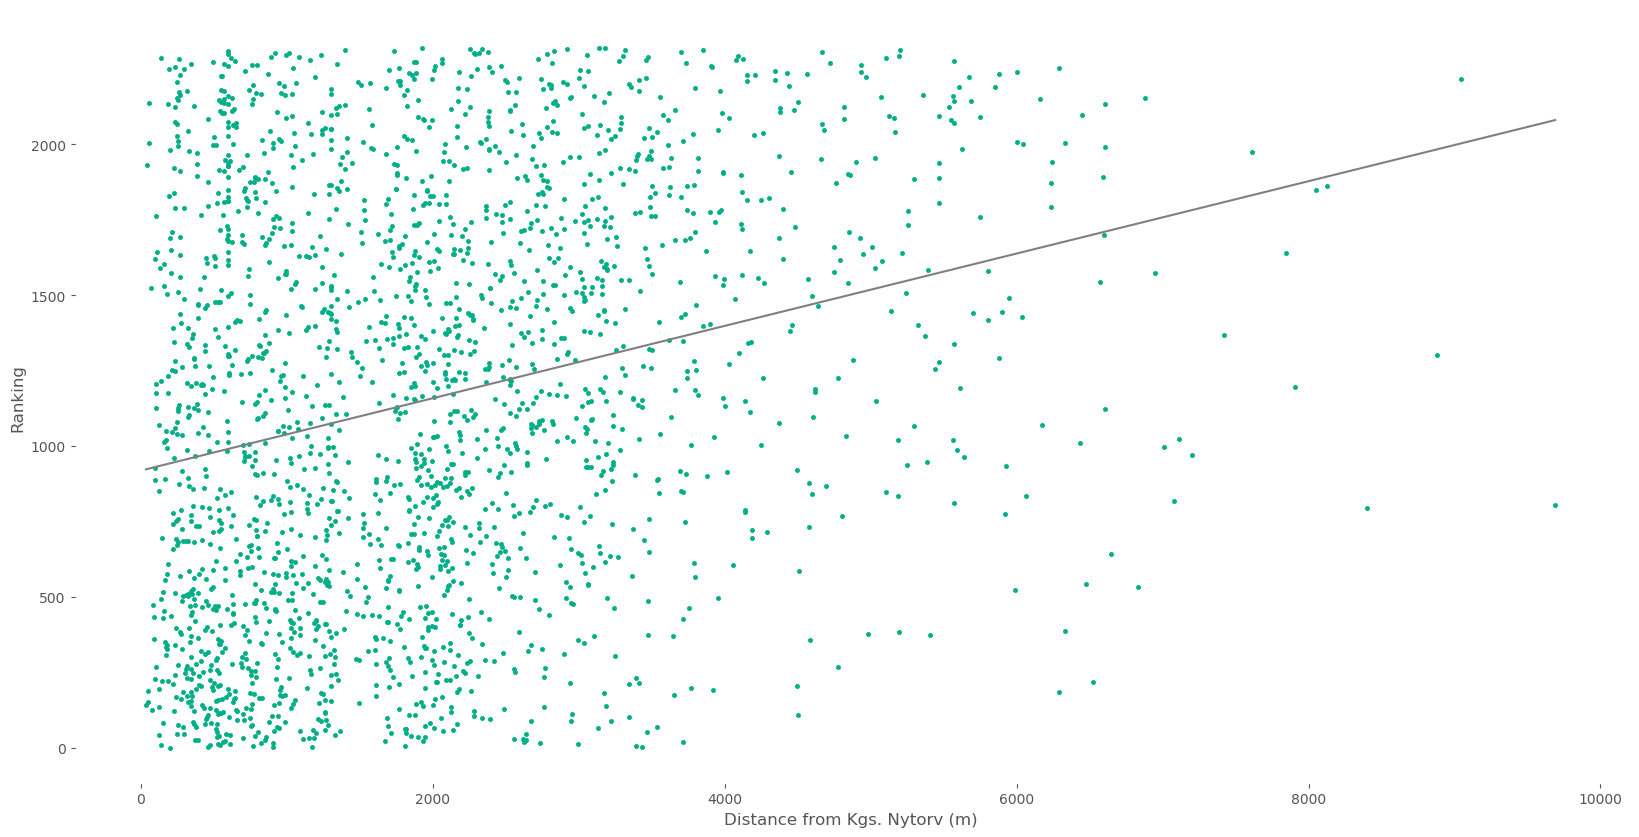

In [11]:
X = mod_df["Distance from Kgs. Nytorv (m)"]
y = mod_df["Full ranking"]

import seaborn as sns
fig, ax = plt.subplots()
ax.scatter(X, y, marker='.', color = green_color)
plt.gcf().set_size_inches((20, 10))    

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='grey')

ax.set_xlabel('Distance from Kgs. Nytorv (m)')
ax.set_ylabel('Ranking')
ax.set_facecolor('white')

plt.savefig('scatter_fit1.jpeg')
plt.show()





## Generate histogram over distance to Kongens Nytorv

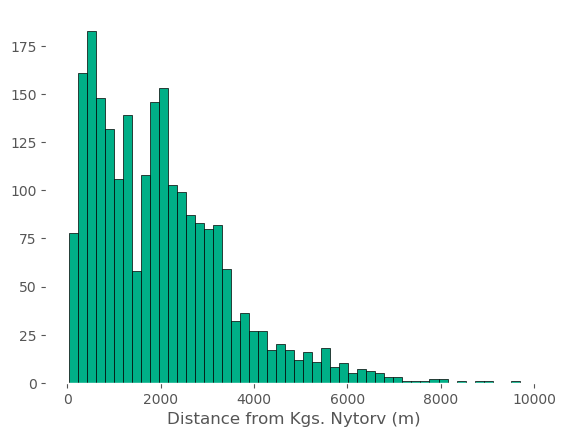

In [12]:
fig, ax = plt.subplots()
    
# Draw the plot
ax.hist(X,color = green_color , bins= 50, edgecolor = 'black')
ax.set_xlabel('Distance from Kgs. Nytorv (m)')
ax.set_facecolor('white')
plt.savefig('distplot.png')
plt.show()


## OLS estimation for servicelevel ranking

In [13]:
# Make dataset only of service is not missing

service_df = mod_df.dropna(subset = ["Service"])
# Make ranking system
service_df["Reverse ranking on list"] = (-1)*service_df["Ranking on list"]

# sort on rating, ranking on list and number of reviews
service_df = service_df.sort_values(by=["Service", "Reverse ranking on list", "Number of reviews"])

# Add ranking
service_df["Full ranking Service"] = range(1,len(service_df["Number of reviews"])+1)

# OLS 
reg2 = sm.OLS(endog=service_df['Full ranking Service'], exog=service_df[['Distance from Kgs. Nytorv (m)', 'Price class numeric', "Number of reviews"]], missing='drop')

results = reg2.fit()

# Write to tex format
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg_service.tex', 'w')
f.write(beginningtex)
f.write(results.summary().as_latex())
f.write(endtex)
f.close()
print(results.summary())




                             OLS Regression Results                             
Dep. Variable:     Full ranking Service   R-squared:                       0.623
Model:                              OLS   Adj. R-squared:                  0.622
Method:                   Least Squares   F-statistic:                     706.3
Date:                  Thu, 29 Aug 2019   Prob (F-statistic):          4.86e-271
Time:                          15:53:31   Log-Likelihood:                -9698.9
No. Observations:                  1286   AIC:                         1.940e+04
Df Residuals:                      1283   BIC:                         1.942e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Generate pie-charts of common food in areas

In [82]:
food_df = pd.read_csv("type_mad_df.csv")

In [93]:
print(type(food_df["Postal code"][1]))

#Copenhagen central post codes 
kbhK =[]
for i in range(1000,1500):
    kbhK.append(str(i))

kbhV = []
for i in range(1500, 1800):
    kbhV.append(str(i))
    
frb = []
for i in range(1800, 2100):
    frb.append(str(i))

food_df["Postal code"] = food_df["Postal code"].str.strip()


<class 'str'>


In [110]:
# remove all with no postal code
food_df =  food_df.dropna(subset = ["Postal code"])
food_df= food_df.replace("False", 0)

list_ = ["Pizza", "Sushi", "Fisk og skaldyr", "Thai", "Café", "Italiensk", "Indisk", "Mexikansk", "Steakhouse"]

# change booleans to 1/0
for x in list_:
    app = []
    for i in food_df[x]:
        if i == True:
            app.append(1)
        else:
            app.append(0)
    #print(app)
    food_df[str(x)]=app

Area = []
# make areas   
for i in food_df["Postal code"]: 
    if i in kbhK:
        Area.append("kbh k")
    elif i in kbhV:
         Area.append("kbh v")
    elif i in frb:
        Area.append("frb.")
    elif i ==  "2100":
        Area.append("kbh ø")
    elif i == "2200":
        Area.append("kbh n")
    elif i == "2300":
        Area.append("kbh s")
    elif i == "2450":
        Area.append("kbh sv")
    elif i == "2400":
        Area.append("valby")
    elif i == "2500":
        Area.append("valby")
    else:
        Area.append("andet")


food_df["City Area"] = Area

In [113]:
food_df.to_csv("data_food_poscode.csv", index=False)